# Bayesian Changepoint Detection with multivariate data in Python

This code computes the probability of changepoints (including changes in correlation) in a time series. In this notebook I show how you can use it. This example is modified from Xiang Xuan's thesis Section 3.2.

First let's generate some data and load some modules:

In [16]:
from __future__ import division
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.generate_data as gd
import seaborn

%matplotlib inline
%load_ext autoreload
%autoreload 2

partition, data = gd.generate_xuan_motivating_example(200,500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's plot this data:

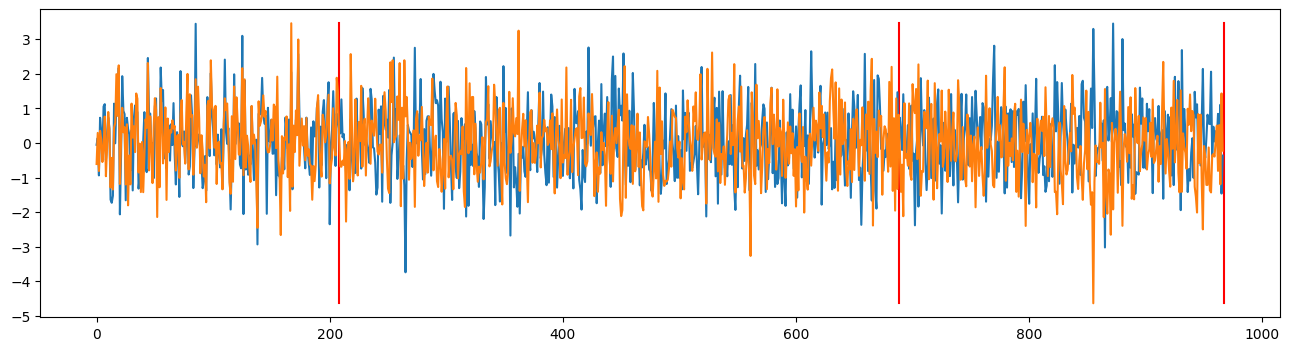

In [17]:
import numpy as np
changes = np.cumsum(partition)

fig, ax = plt.subplots(figsize=[16, 4])
for p in changes:
    ax.plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax.plot(data[:,d])

Let's try to detect the changes with independent features:

In [18]:
from bayesian_changepoint_detection.priors import const_prior
from bayesian_changepoint_detection.offline_likelihoods import IndepentFeaturesLikelihood
from bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection
from functools import partial

Q_ifm, P_ifm, Pcp_ifm = offline_changepoint_detection(
    data, partial(const_prior, p=1/(len(data) + 1)), IndepentFeaturesLikelihood(), truncate=-20
)

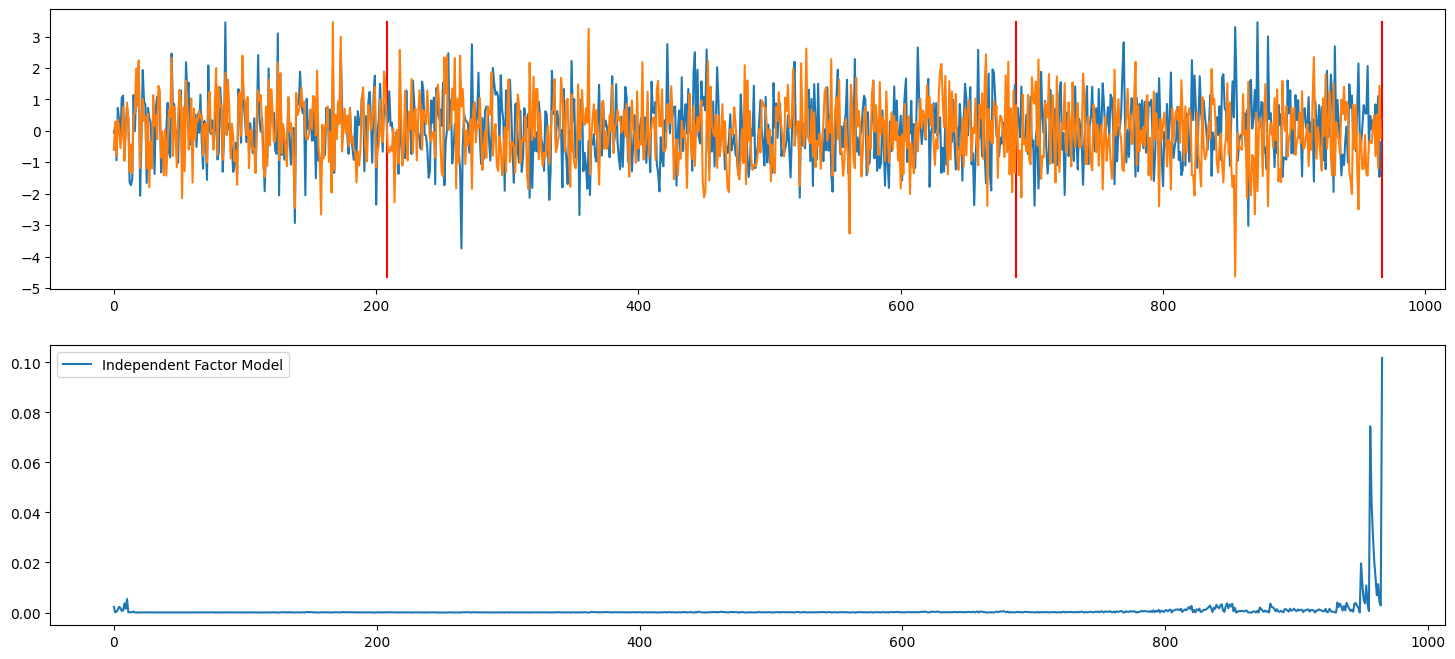

In [19]:
fig, ax = plt.subplots(2, figsize=[18, 8])
for p in changes:
    ax[0].plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax[0].plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax[1].plot(np.exp(Pcp_ifm).sum(0))
plt.legend(['Independent Factor Model'])
plt.show()

Unfortunately, not very good... Now let's try the full covariance model (warning, it'll take a while):

In [20]:
from bayesian_changepoint_detection.offline_likelihoods import FullCovarianceLikelihood
Q_full, P_full, Pcp_full = offline_changepoint_detection(
    data, partial(const_prior, p=1/(len(data)+1)), FullCovarianceLikelihood(), truncate=-20
)

In [25]:
from bayesian_changepoint_detection.offline_likelihoods import FullCovarianceLikelihood
csv_folder = "/home/campus.ncl.ac.uk/c4060464/esp32/microWATCH/datasets/csv/"

# for all files in the folder
import os
for file_name in os.listdir(csv_folder):
    print("Reading file: ", file_name)
    file_path = csv_folder + file_name
    data =np.loadtxt(file_path, delimiter=',')
    # print("Data shape: ", data.shape)
    # skip if is multi-dimensional
    # if len(data.shape) > 1:
    #     continue

    Q_full, P_full, Pcp_full = offline_changepoint_detection(
        data, partial(const_prior, p=1/(len(data)+1)), FullCovarianceLikelihood(), truncate=-20
    )

Reading file:  bank.csv
Reading file:  shanghai_license.csv
Reading file:  nile.csv
Reading file:  construction.csv
Reading file:  well_log.csv
Reading file:  centralia.csv
Reading file:  gdp_japan.csv
Reading file:  jfk_passengers.csv
Reading file:  businv.csv
Reading file:  quality_control_4.csv
Reading file:  brent_spot.csv
Reading file:  robocalls.csv
Reading file:  ozone.csv
Reading file:  scanline_42049.csv
Reading file:  seatbelts.csv
Reading file:  bee_waggle_6.csv
Reading file:  quality_control_2.csv
Reading file:  children_per_woman.csv
Reading file:  apple.csv
Reading file:  run_log.csv
Reading file:  scanline_126007.csv
Reading file:  unemployment_nl.csv
Reading file:  gdp_iran.csv
Reading file:  co2_canada.csv
Reading file:  lga_passengers.csv
Reading file:  rail_lines.csv
Reading file:  occupancy.csv
Reading file:  uk_coal_employ.csv
Reading file:  bitcoin.csv
Reading file:  quality_control_3.csv
Reading file:  measles.csv
Reading file:  us_population.csv
Reading file:  g

Reading file:  apple.csv
Data shape:  (622, 2)


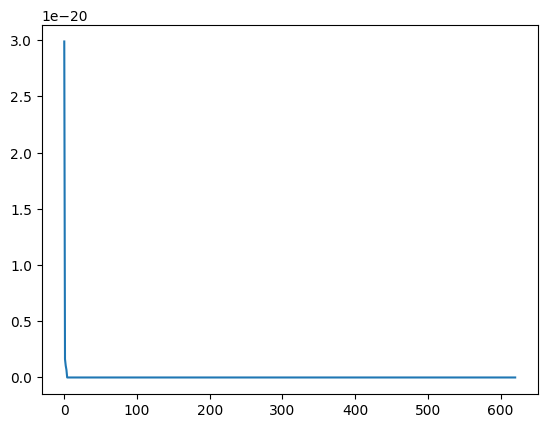

In [22]:
# test for data from the  csv folder
csv_folder = "/home/campus.ncl.ac.uk/c4060464/esp32/microWATCH/datasets/csv/"
file_name = "apple.csv"
print("Reading file: ", file_name)
file_path = csv_folder + file_name
data =np.loadtxt(file_path, delimiter=',')
print("Data shape: ", data.shape)
Q_full, P_full, Pcp_full = offline_changepoint_detection(
    data, partial(const_prior, p=1/(len(data)+1)), FullCovarianceLikelihood(), truncate=-20
)

plt.plot(np.exp(Pcp_full).sum(0))
plt.show()


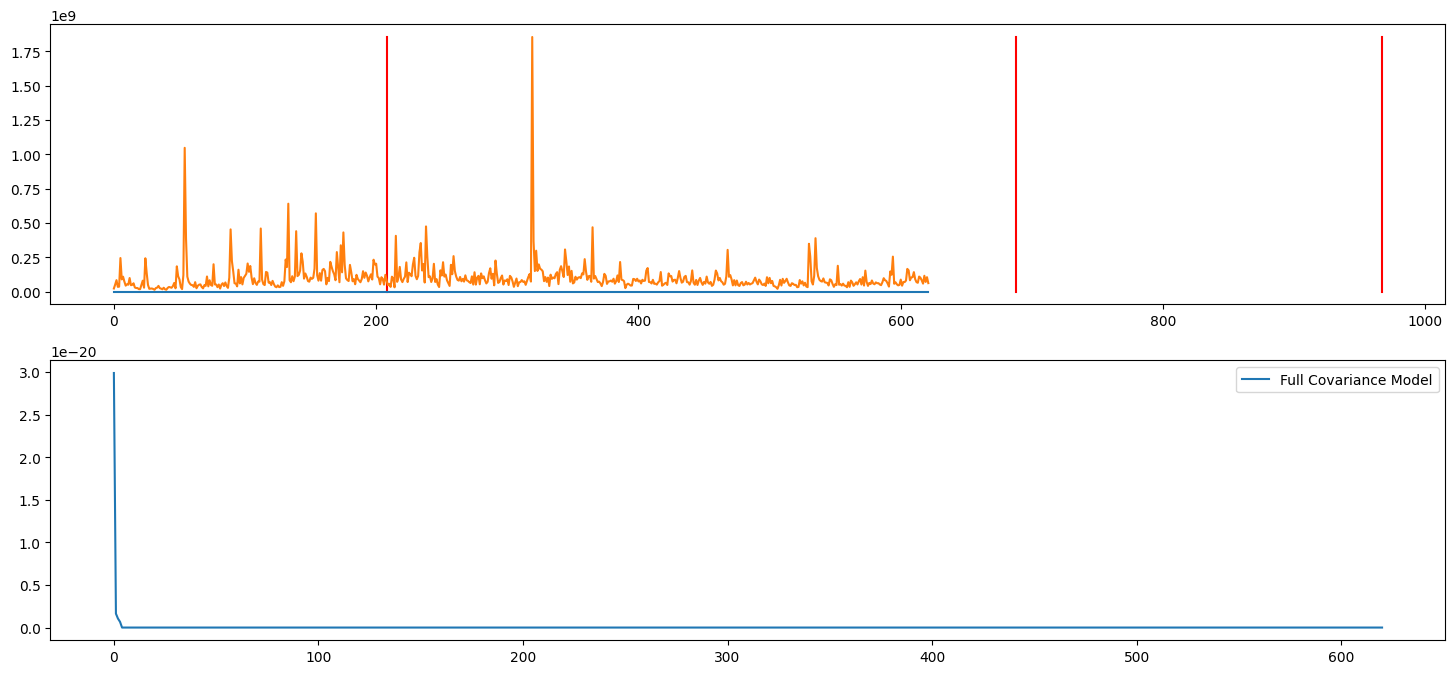

In [23]:
fig, ax = plt.subplots(2, figsize=[18, 8])
for p in changes:
    ax[0].plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
    ax[0].plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax[1].plot(np.exp(Pcp_full).sum(0))
plt.legend(['Full Covariance Model'])
plt.show()

Ahh, much better now!

In [24]:
%timeit Q_ifm, P_ifm, Pcp_ifm = offline_changepoint_detection(data, partial(const_prior, p=1/(len(data)+1)), IndepentFeaturesLikelihood(), truncate=-20)

2.44 s ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
